# Modelos Multiplos Preditivos - Cap. 8
## 0 - Bibliotecas importadas

In [35]:
import pandas as pd
import numpy as np

## 1 - Carregando dataset 'Wine Quality'
* Dados numéricos;
* Não houve necessidade de fazer tratamento quanto a falta ou inconsistência nos dados;
* 11 características e target sendo sobre a qualidade do vinho (0-qualidade ruim- até 10-Excelente qualidade-);
* Não está balanceado (há mais vinhos normais do que excelentes ou ruins);

### Vinho Branco

In [36]:
df_white = pd.read_csv('./winequality-white.csv', sep = ';')
print("Quantidade amostra = ",df_white['quality'].count())
df_white.head()

Quantidade amostra =  4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Text(0, 0.5, 'Frequência')

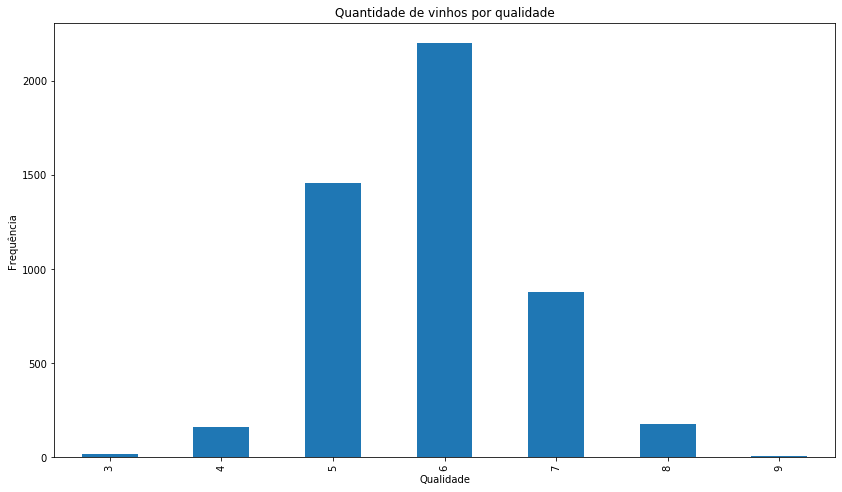

In [37]:
ax = df_white['quality'].value_counts().sort_index().plot.bar(
                                    y = [1,2,3,4,5,6,7,8,9,10,11],
                                    figsize=(14,8),
                                    title="Quantidade de vinhos por qualidade"
                                    )
ax.set_xlabel("Qualidade")
ax.set_ylabel("Frequência")

## 2 - Pré-Processamento

In [38]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#### StandardScale
> class sklearn.preprocessing.StandardScaler(**copy**=True, **with_mean**=True, **with_std**=True)

In [39]:
ss = StandardScaler()
df_white_scaler = ss.fit_transform(df_white.values.reshape(-1,1))
df_white_scaler

array([[-0.26012868],
       [-0.42868147],
       [-0.42642742],
       ...,
       [-0.42742922],
       [-0.13991273],
       [-0.28517367]])

## 3 - Treinamento

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Normalmente, em python, o X tem relação com o dataframe gerado e o 'y' com os valores em target
X = df_white.iloc[:,:11]
y = df_white['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=1)

### Bagging
>class sklearn.ensemble.BaggingClassifier(**base_estimator**=None, **n_estimators**=10, **max_samples**=1.0, **max_features**=1.0, **bootstrap**=True, **bootstrap_features**=False, **oob_score**=False, **warm_start**=False, **n_jobs**=None, **random_state**=None, **verbose**=0)

In [66]:
from sklearn.ensemble import BaggingClassifier
k_range = [10,20,30,40,50,60,70,80,90, 100]
bc_list_predict = []
for k in k_range:
        
    bc = BaggingClassifier( n_estimators = k,
                            random_state = 1
                          )
    bc.fit(X_train,y_train)
    bc_list_predict.append(bc.predict(X_test))

### Decision Tree
> class sklearn.tree.DecisionTreeClassifier(**criterion**='gini', **splitter**='best', **max_depth**=None, **min_samples_split**=2, **min_samples_leaf**=1, **min_weight_fraction_leaf**=0.0, **max_features**=None, **random_state**=None, **max_leaf_nodes**=None, **min_impurity_decrease**=0.0, **min_impurity_split**=None, **class_weight**=None, **presort**='deprecated', **ccp_alpha**=0.0)

In [67]:
from sklearn.tree import DecisionTreeClassifier
k_range = [None,2,3,4,5,6,7,8,9,10]
dtc_list_predict = []
for k in k_range :
    dtc = DecisionTreeClassifier(max_depth = k,
                                random_state = 1 )
    dtc.fit(X_train,y_train)
    dtc_list_predict.append(dtc.predict(X_test))

### Random Forest
> class sklearn.ensemble.RandomForestClassifier(**n_estimators**=100, **criterion**='gini', **max_depth**=None, **min_samples_split**=2, **min_samples_leaf**=1, **min_weight_fraction_leaf**=0.0, **max_features**='auto', **max_leaf_nodes**=None, **min_impurity_decrease**=0.0, **min_impurity_split**=None, **bootstrap**=True, **oob_score**=False, **n_jobs**=None, **random_state**=None, **verbose**=0, **warm_start**=False, **class_weight**=None, **ccp_alpha**=0.0, **max_samples**=None)


In [58]:
from sklearn.ensemble import RandomForestClassifier
k_range = [100,200,300,400,500,600,700,800,900,1000]
rfc_list_predict = []
for k in k_range:
    rfc = RandomForestClassifier(n_estimators= k,
                                  max_features= 'auto',     
                                  bootstrap = 'TRUE',
                                  n_jobs = -1, 
                                  random_state = 1  )
    rfc.fit(X_train,y_train)
    rfc_list_predict.append(rfc.predict(X_test))

In [ ]:
feature_importantes = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importantes)

## 4 - Avaliação

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score

### Bagging

In [ ]:
bc_conf_matrix = confusion_matrix(y_test, bc_predict)
bc_acc_score = accuracy_score(y_test, bc_predict)
print(bc_conf_matrix)
print(bc_acc_score*100)

### Decision Tree

In [ ]:
dtc_conf_matrix = confusion_matrix(y_test, dtc_predict)
dtc_acc_score = accuracy_score(y_test, dtc_predict)
print(dtc_conf_matrix)
print(dtc_acc_score*100)

### Random Forest

#### Matriz de Confusão

In [ ]:
rfc_conf_matrix = confusion_matrix(y_test, rfc_predict)
rfc_conf_matrix

#### Acurácia

In [53]:
for i in range(0,len(rfc_list_predict)-1):
    rfc_acc_score = accuracy_score(y_test, rfc_list_predict[i])
    print('Acurácia =',rfc_acc_score)


Acurácia = 0.6702040816326531
Acurácia = 0.6791836734693878
Acurácia = 0.6759183673469388
Acurácia = 0.676734693877551
Acurácia = 0.6857142857142857
Acurácia = 0.6726530612244898
Acurácia = 0.6775510204081633
Acurácia = 0.676734693877551
Acurácia = 0.6791836734693878
Acurácia = 0.6816326530612244


#### Revocação

#### Precisão

#### F1-Score

# ------------------------Extra ---------------------------

## GridSearchCV

In [62]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion':['gini','entropy'],
    'bootstrap': [True],
    'max_depth': [80,100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [100,300,500,1000]
}
rfc = RandomForestClassifier()
# cv = n-cross-validation
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, refit = 'TRUE')
grid_search.fit(X_train, y_train)
best_grid = grid_search.best_estimator_
print('Melhores parametros = \n',grid_search.best_params_)
print('\nMelhor pontuação: \n',grid_search.best_score_)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min


KeyboardInterrupt: 